In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('ifood_df.csv')
df = shuffle(df)
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1753,65370.0,0,0,1,71,22,112,138,89,29,...,0,0,1,0,0,0,0,432,403,0
1085,76045.0,0,0,78,760,53,400,17,93,0,...,0,0,0,0,0,0,1,1323,1323,1
698,58710.0,0,1,77,440,81,368,0,122,174,...,0,0,0,0,1,0,0,1011,837,0
534,21474.0,1,0,0,6,16,24,11,0,34,...,0,0,0,0,1,0,0,57,23,1
676,34824.0,0,0,65,4,2,11,2,0,4,...,0,0,0,0,1,0,0,19,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,30833.0,1,1,33,11,0,7,3,1,6,...,0,0,0,0,1,0,0,22,16,0
819,56628.0,0,1,30,479,5,82,7,17,171,...,0,0,0,0,1,0,0,590,419,1
1090,76773.0,0,0,79,516,56,449,86,33,16,...,0,0,0,0,1,0,0,1140,1124,0
1995,43815.0,1,0,53,14,10,29,4,7,15,...,0,0,0,0,0,1,0,64,49,0


In [3]:
scaler = RobustScaler()
X = scaler.fit_transform(df)

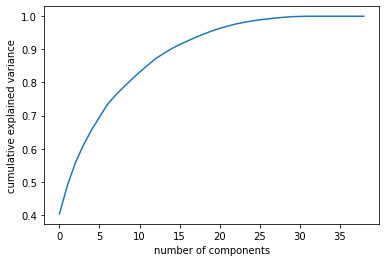

In [4]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [5]:
X = PCA(n_components=8).fit_transform(X)

In [6]:
X

array([[ 1.62491797, -1.67758129,  0.68083068, ..., -0.89262253,
         0.77468677, -0.45108608],
       [ 2.49736925, -0.87295289, -1.66930466, ...,  0.22292696,
        -1.19507066,  0.44186824],
       [ 3.26429819,  2.36384941,  2.26157812, ...,  1.01390672,
        -2.02232006,  1.15222546],
       ...,
       [ 2.05149334, -0.99795155, -0.70016425, ..., -1.00044363,
         0.37931745,  0.69900623],
       [-1.96026934, -1.00690637,  0.06406928, ...,  0.50168877,
         0.04525589,  0.23246193],
       [-1.45400055, -0.08896456,  0.14749457, ..., -0.35212191,
        -0.30558993,  0.24785653]])

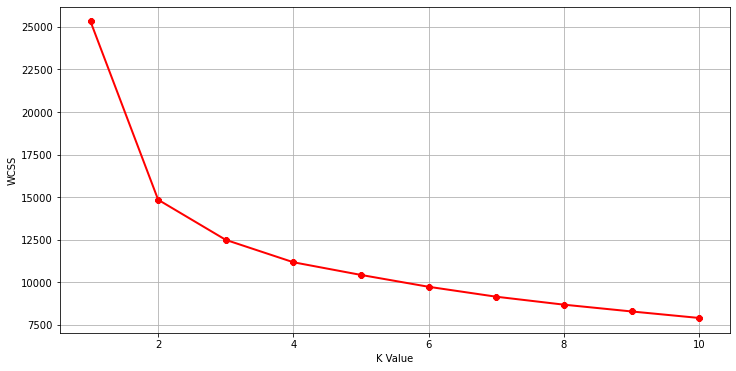

In [7]:
wcss = []

for i in range(1,11):
    model = KMeans(n_clusters=i, init="k-means++")
    model.fit(X)
    wcss.append(model.inertia_)

plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

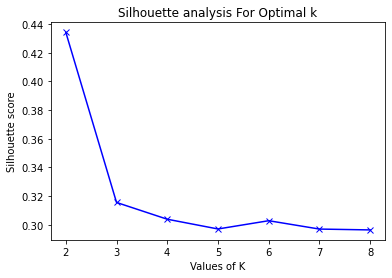

In [8]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:

    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3)    
labels = kmeans.fit_predict(X)

In [10]:
df_plus_label = pd.DataFrame(X)
df_plus_label['label'] =labels

df_plus_label

,0,1,2,3,4,5,6,7,label
0,1.624918,-1.677581,0.680831,-0.450540,1.499168,-0.892623,0.774687,-0.451086,2
1,2.497369,-0.872953,-1.669305,-1.523885,0.328588,0.222927,-1.195071,0.441868,2
2,3.264298,2.363849,2.261578,-0.439492,0.844999,1.013907,-2.022320,1.152225,2
3,-1.845271,-0.696630,0.203953,0.807569,-0.083443,1.538025,0.368248,-0.717507,1
4,-2.293977,-1.442650,-0.048650,0.511514,0.121062,0.629578,0.209787,0.464946,1
...,...,...,...,...,...,...,...,...,...
2200,-2.367483,-0.403617,0.067615,-0.102623,-0.021028,-0.683351,-0.267246,-0.232339,1
2201,0.377950,1.562406,-0.049057,2.438536,0.797081,0.399828,-0.941341,-0.053219,0
2202,2.051493,-0.997952,-0.700164,-0.417917,-0.767456,-1.000444,0.379317,0.699006,2
2203,-1.960269,-1.006906,0.064069,0.241389,0.019671,0.501689,0.045256,0.232462,1


<AxesSubplot:xlabel='0', ylabel='1'>

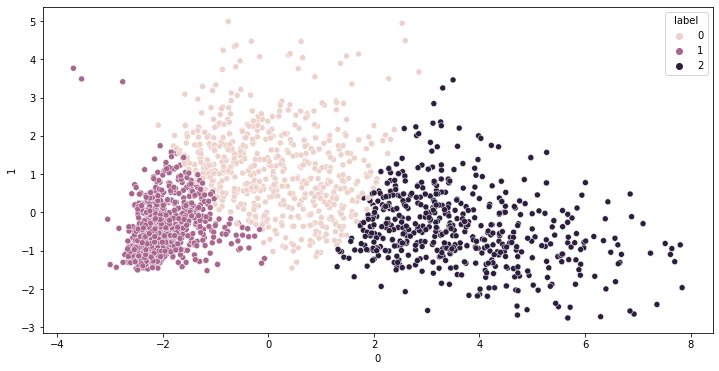

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_plus_label,x=0,y=1, hue='label')

<AxesSubplot:xlabel='0', ylabel='2'>

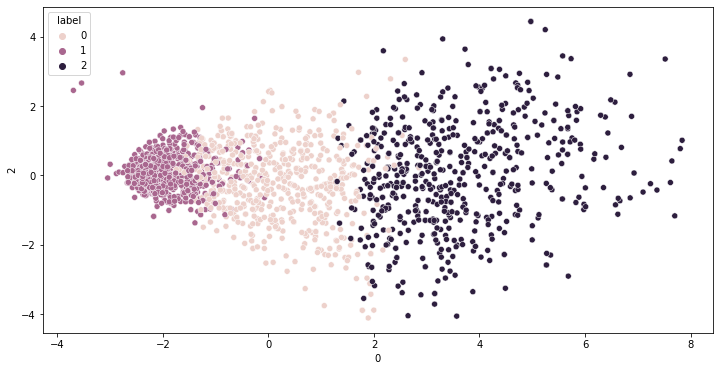

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_plus_label,x=0,y=2, hue='label')

<AxesSubplot:xlabel='Income', ylabel='MntTotal'>

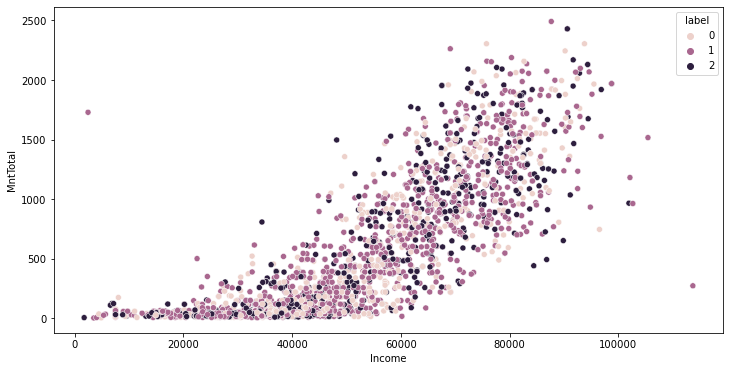

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Income'], y=df['MntTotal'], hue=df_plus_label['label'])

<AxesSubplot:xlabel='Income', ylabel='MntRegularProds'>

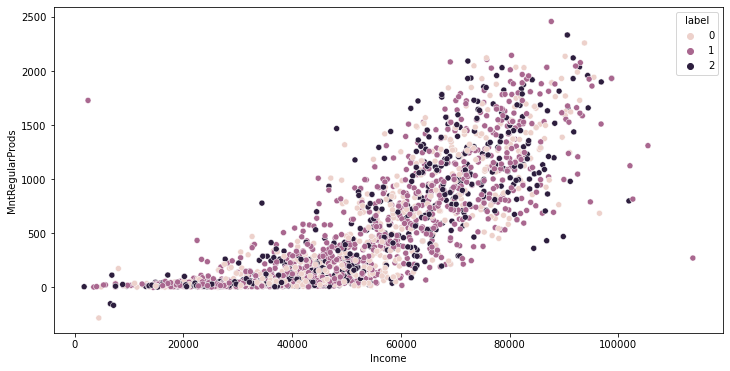

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Income'], y=df['MntRegularProds'], hue=df_plus_label['label'])

<AxesSubplot:xlabel='MntTotal', ylabel='MntRegularProds'>

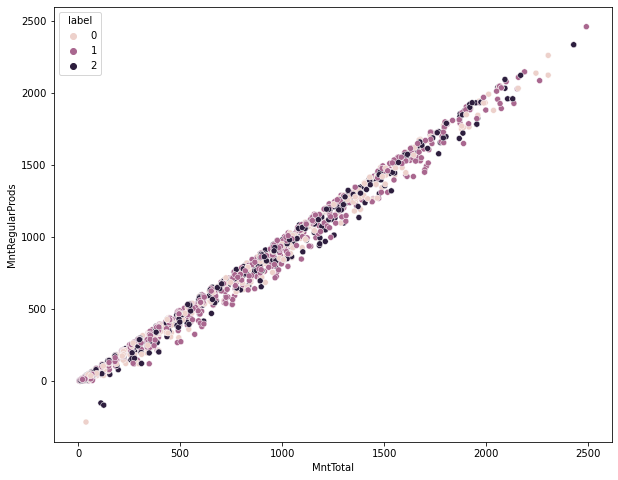

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['MntTotal'], y=df['MntRegularProds'], hue=df_plus_label['label'])

In [16]:
df['label'] = labels
df.groupby('label').mean().T

label,0,1,2
Income,58648.639344,34770.973863,74969.097865
Kidhome,0.242623,0.770571,0.055160
Teenhome,0.818033,0.464666,0.245552
Recency,48.267213,48.964182,49.896797
MntWines,481.645902,45.800581,594.265125
MntFruits,18.801639,4.700871,74.544484
MntMeatProducts,147.342623,22.997096,446.402135
MntFishProducts,28.604918,6.450145,105.233096
MntSweetProducts,18.872131,4.891578,76.962633
MntGoldProds,60.660656,14.299129,80.733096


In [17]:
kmeans = KMeans(n_clusters=2)    
labels = kmeans.fit_predict(X)
df['label'] = labels
df.groupby('label').mean().T

label,0,1
Income,72860.223419,40828.709302
Kidhome,0.068641,0.632011
Teenhome,0.336474,0.593023
Recency,49.668910,48.673735
MntWines,605.192463,154.196306
MntFruits,63.771198,7.412449
MntMeatProducts,399.020188,46.539672
MntFishProducts,91.423957,10.482216
MntSweetProducts,65.912517,7.417921
MntGoldProds,79.094213,26.251026


<AxesSubplot:xlabel='MntTotal', ylabel='MntRegularProds'>

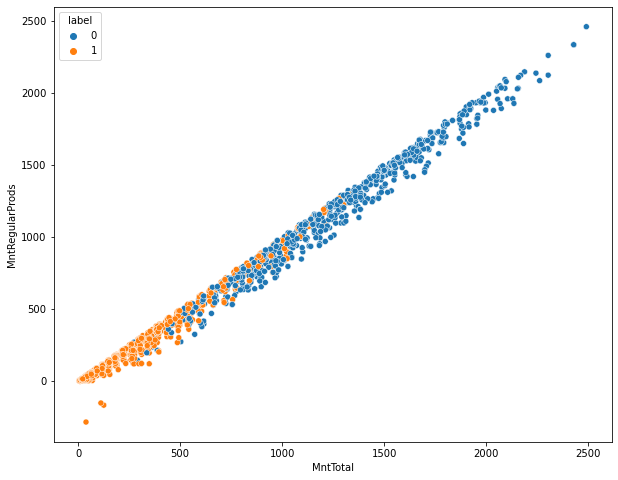

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['MntTotal'], y=df['MntRegularProds'], hue=df['label'])